<a href="https://colab.research.google.com/github/robertomartinezedu/Curso-IA-BigData/blob/main/PIA_UD2_Entrega2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 - AED

En esta práctiva, se va a realizar un análisis exporatorio de datos previo para poder observar la naturaleza de los datos del dataset propuesto para análisis.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('dataset.csv')
df.head()


,Unnamed: 0,index,age,gender,education,job,experience,salary,country,race
0,0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,2,NaN,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


Se va a poner la columna index como índice y se procede a borrar la columna Unnamed: 0.

In [ ]:
df = df.drop(columns=['Unnamed: 0'])
df = df.set_index('index')

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6704 entries, 0 to 6703
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         6142 non-null   float64
 1   gender      6702 non-null   object 
 2   education   6701 non-null   object 
 3   job         6702 non-null   object 
 4   experience  6701 non-null   float64
 5   salary      6699 non-null   float64
 6   country     6704 non-null   object 
 7   race        6704 non-null   object 
dtypes: float64(3), object(5)
memory usage: 471.4+ KB
None


In [ ]:
# Verificar valores faltantes
print(df.isnull().sum())

age           562
gender          2
education       3
job             2
experience      3
salary          5
country         0
race            0
dtype: int64


In [ ]:
# Eliminación de filas con valores nulos
df = df.dropna()
print(df.isnull().sum())

age           0
gender        0
education     0
job           0
experience    0
salary        0
country       0
race          0
dtype: int64


In [ ]:
# Resumen estadístico de las variables numéricas
print(df.describe())

               age   experience         salary
count  6138.000000  6138.000000    6138.000000
mean     33.618768     8.092375  115383.555556
std       7.690717     6.061195   52949.376292
min      -1.000000     0.000000     350.000000
25%      28.000000     3.000000   70000.000000
50%      32.000000     7.000000  115000.000000
75%      38.000000    12.000000  160000.000000
max      62.000000    33.000000  250000.000000


Parece que hay valores extraños, como edad negativa y salarios muy bajos. Por el momento se van a eliminar los datos de aquellos sujetos que estén por debajo de la edad mínima legal para trabajar.  

In [ ]:
df = df[df['age'] >= 18]

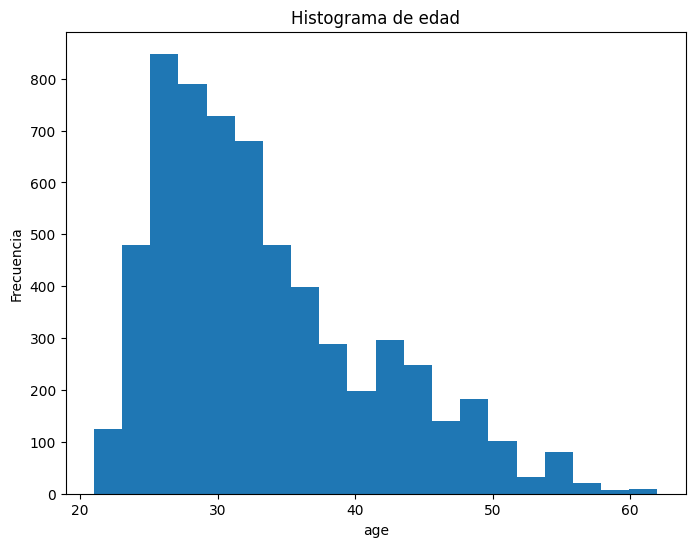

In [ ]:
# Histograma de una variable numérica (ejemplo)
# Reemplaza 'variable_numerica' con el nombre de tu columna
plt.figure(figsize=(8, 6))
plt.hist(df['age'], bins=20)
plt.xlabel('age')
plt.ylabel('Frecuencia')
plt.title('Histograma de edad')
plt.show()

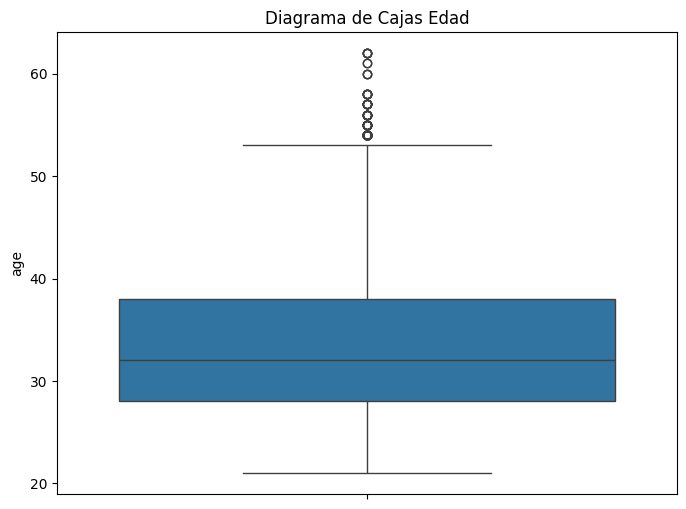

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['age'])
plt.ylabel('age')
plt.title('Diagrama de Cajas Edad')
plt.show()

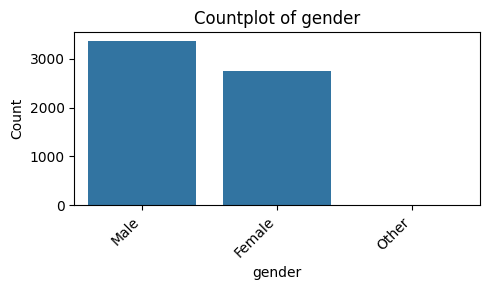

In [ ]:
categorical_column = 'gender'
plt.figure(figsize=(5, 3))
sns.countplot(x=categorical_column, data=df)
plt.xlabel(categorical_column)
plt.ylabel('Count')
plt.title(f'Countplot of {categorical_column}')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

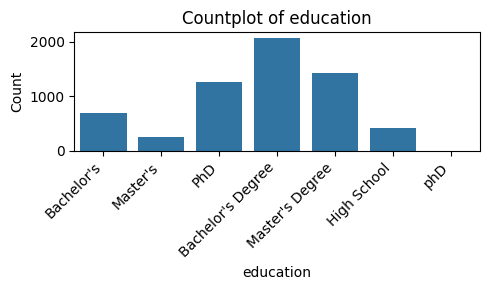

In [ ]:
categorical_column = 'education'
plt.figure(figsize=(5, 3))
sns.countplot(x=categorical_column, data=df)
plt.xlabel(categorical_column)
plt.ylabel('Count')
plt.title(f'Countplot of {categorical_column}')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

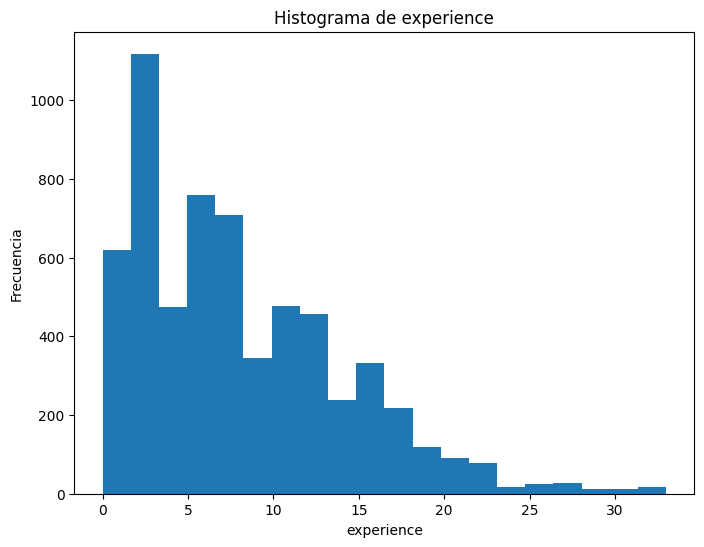

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['experience'], bins=20)
plt.xlabel('experience')
plt.ylabel('Frecuencia')
plt.title('Histograma de experience')
plt.show()

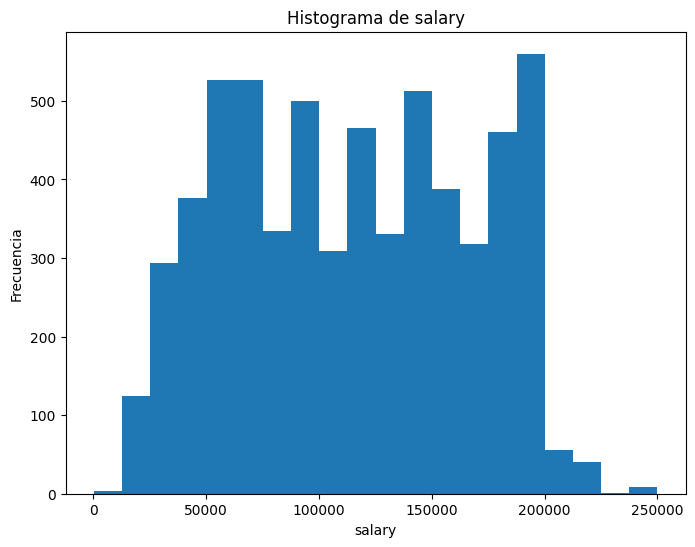

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['salary'], bins=20)
plt.xlabel('salary')
plt.ylabel('Frecuencia')
plt.title('Histograma de salary')
plt.show()

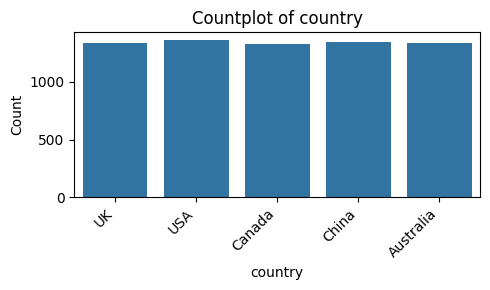

In [ ]:
categorical_column = 'country'
plt.figure(figsize=(5, 3))
sns.countplot(x=categorical_column, data=df)
plt.xlabel(categorical_column)
plt.ylabel('Count')
plt.title(f'Countplot of {categorical_column}')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

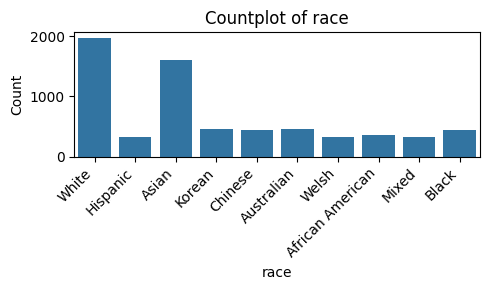

In [ ]:
categorical_column = 'race'
plt.figure(figsize=(5, 3))
sns.countplot(x=categorical_column, data=df)
plt.xlabel(categorical_column)
plt.ylabel('Count')
plt.title(f'Countplot of {categorical_column}')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

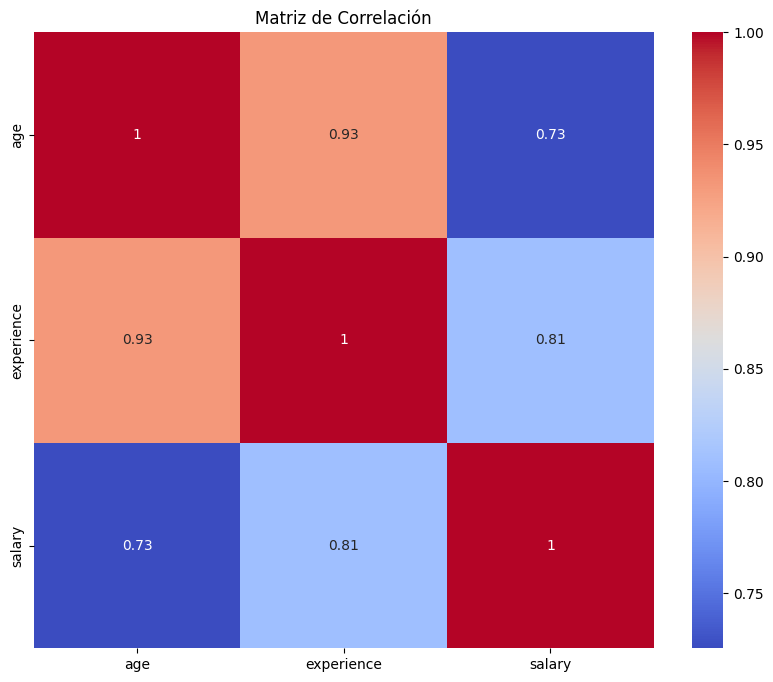

In [ ]:
# Matriz de correlación (para variables numéricas)
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

Según podíamos esperar, la edad y la experiencia laboral están correladas con el salario.

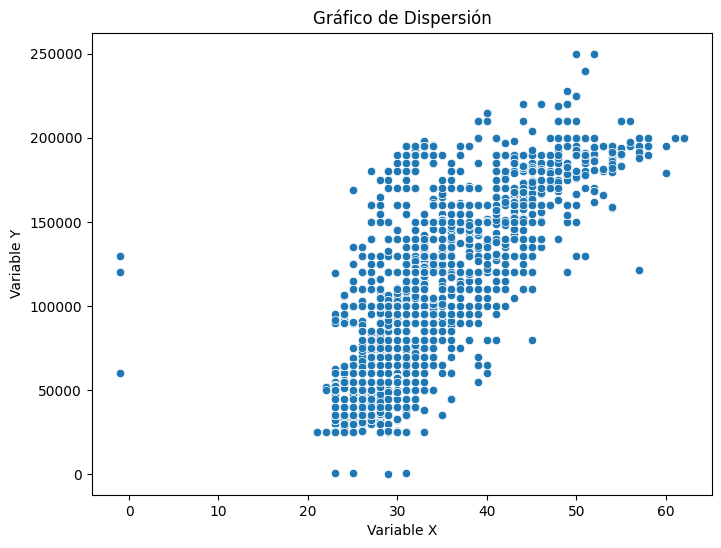

In [ ]:
# Gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='salary', data=df)
plt.xlabel('age')
plt.ylabel('salary')
plt.title('Gráfico de Dispersión')
plt.show()

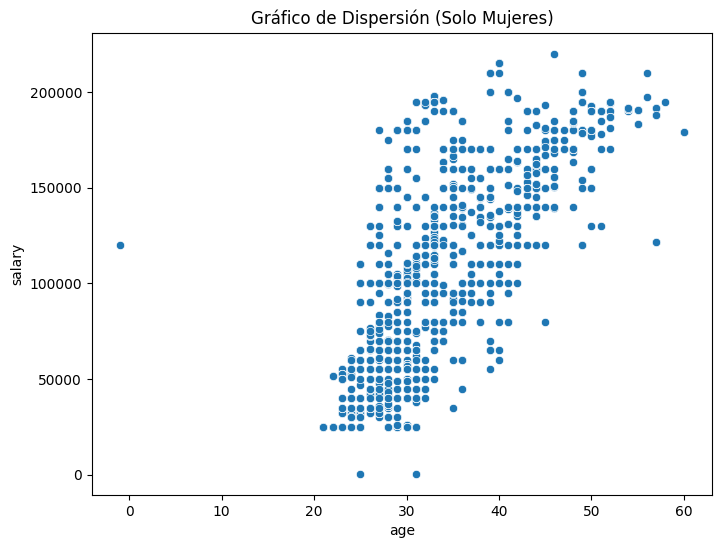

In [ ]:
plt.figure(figsize=(8, 6))
female_data = df[df['gender'] == 'Female']
sns.scatterplot(x='age', y='salary', data=female_data)
plt.xlabel('age')
plt.ylabel('salary')
plt.title('Gráfico de Dispersión (Solo Mujeres)')
plt.show()

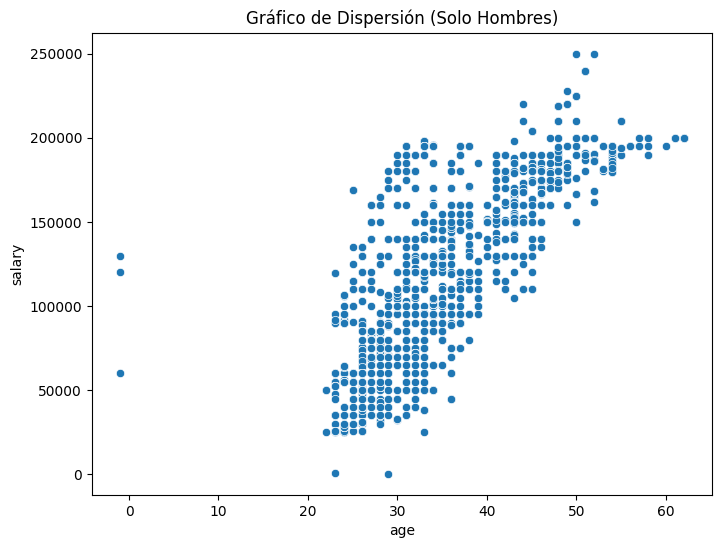

In [ ]:
plt.figure(figsize=(8, 6))
male_data = df[df['gender'] == 'Male']
sns.scatterplot(x='age', y='salary', data=male_data)
plt.xlabel('age')
plt.ylabel('salary')
plt.title('Gráfico de Dispersión (Solo Hombres)')
plt.show()

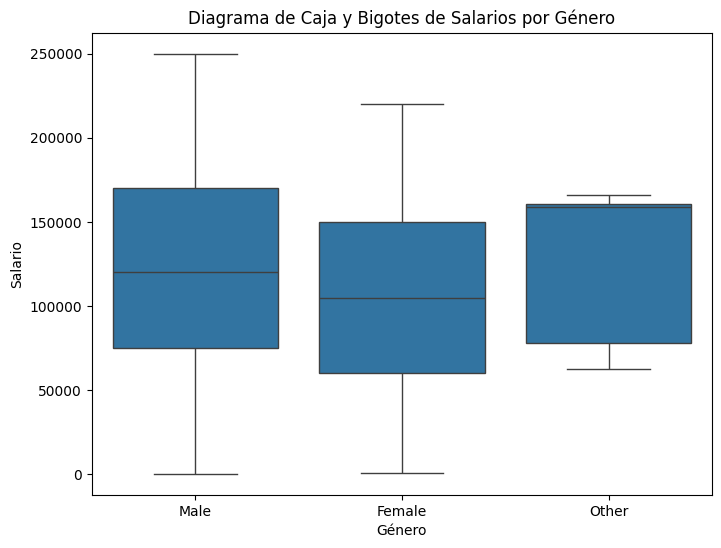

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='salary', data=df)
plt.xlabel('Género')
plt.ylabel('Salario')
plt.title('Diagrama de Caja y Bigotes de Salarios por Género')
plt.show()

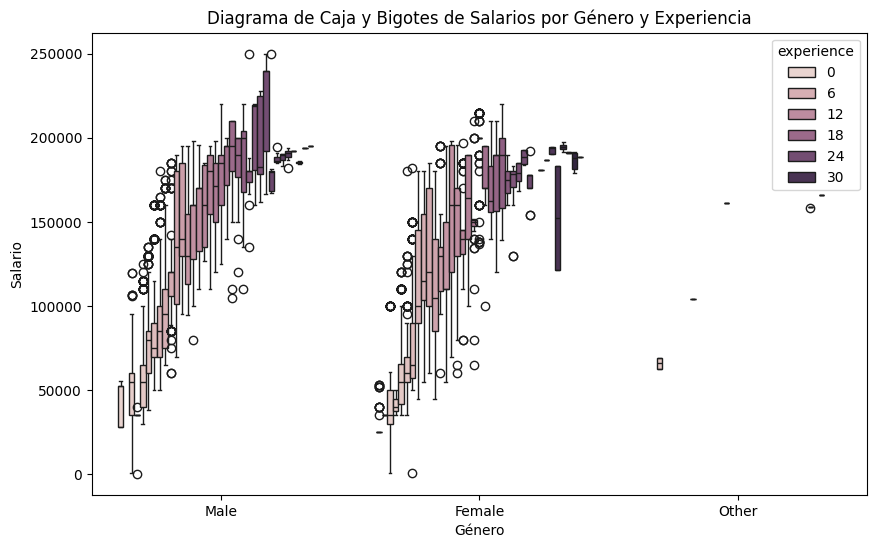

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='salary', hue='experience', data=df)
plt.xlabel('Género')
plt.ylabel('Salario')
plt.title('Diagrama de Caja y Bigotes de Salarios por Género y Experiencia')
plt.show()